## Import des librairies ##

In [6]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Affichage de Graphes
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt

#Information Mutuelle
from sklearn.feature_selection import mutual_info_regression


## 1. Lecture des données ##

1.1 Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

In [7]:
train = pd.read_csv('passagers.csv')
print(train.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

1.2 Charger les données d'apprentissage (Data/test.csv) dans un Dataframe nommé test. Afficher 10 exemples.

In [9]:
test = pd.read_csv('test.csv')
print(test.head(10))

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1

1.3 Afficher les informations des deux DataFrames train et Test.

In [10]:
print(train.info())
print(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

1.4 Calculer le taux global de survie

In [11]:
survival_rate = train['Survived'].mean()
print(f"Le taux global de survie est de : {survival_rate:.2f}")

Le taux global de survie est de : 0.38


#### Question 1 : Quel Travail voyez-vous pour que les données soient prêtes à faire tourner dans un modèle ?
 Gerer les valeurs maquantes qui sont l'imputation ou la supression ensuite on vas transfomer des variables catégoriques en numériques
 Créer de nouvelles features



#### Question 2 : Quelle différence y-a-t'il entre les données train et les données test ?

Les données train incluent la colonne cible pour entraîner le modèle./Les données test ne contiennent pas la colonne cible, elles sont utilisées pour évaluer les performances du modèle.


#### Question 3 : Quel est le rôle de ces deux sets de données ?
Train : Pour entraîner le modèle et ajuster les paramètres.
Test : Pour tester le modèle sur des données inconnues et évaluer ses performances.



## 2. Analyse des features

2.1 Analyser l'effet de la variable Classe sur le taux de survie, en affichant le % de survie par classe

In [12]:
survival_rate_by_class = train.groupby('Pclass')['Survived'].mean()

print(survival_rate_by_class)

survival_rate_percentage = survival_rate_by_class * 100
survival_rate_percentage

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


2.2 Analyser l'effet de la variable Genre (Sex) sur le taux de survie, en affichant le % de survie par classe

In [13]:
survival_rate_by_sex = train.groupby('Sex')['Survived'].mean()
print(survival_rate_by_sex)

survival_rate_percentage_sex = survival_rate_by_sex * 100
survival_rate_percentage_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


,Survived
Sex,
female,74.203822
male,18.890815


2.3 Calculer une nouvelle colonne FamilySize contenant la taille de la famille, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et la taille de la famille.

In [14]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

print(train[['PassengerId', 'Name', 'Age', 'Sex', 'FamilySize']].head(10))

   PassengerId                                               Name   Age  \
0            1                            Braund, Mr. Owen Harris  22.0   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2            3                             Heikkinen, Miss. Laina  26.0   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4            5                           Allen, Mr. William Henry  35.0   
5            6                                   Moran, Mr. James   NaN   
6            7                            McCarthy, Mr. Timothy J  54.0   
7            8                     Palsson, Master. Gosta Leonard   2.0   
8            9  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0   
9           10                Nasser, Mrs. Nicholas (Adele Achem)  14.0   

      Sex  FamilySize  
0    male           2  
1  female           2  
2  female           1  
3  female           2  
4    male           1  
5    male           1  
6    m

2.4 Visualisez le nombre de personnes et le taux de survie par taille de famille.

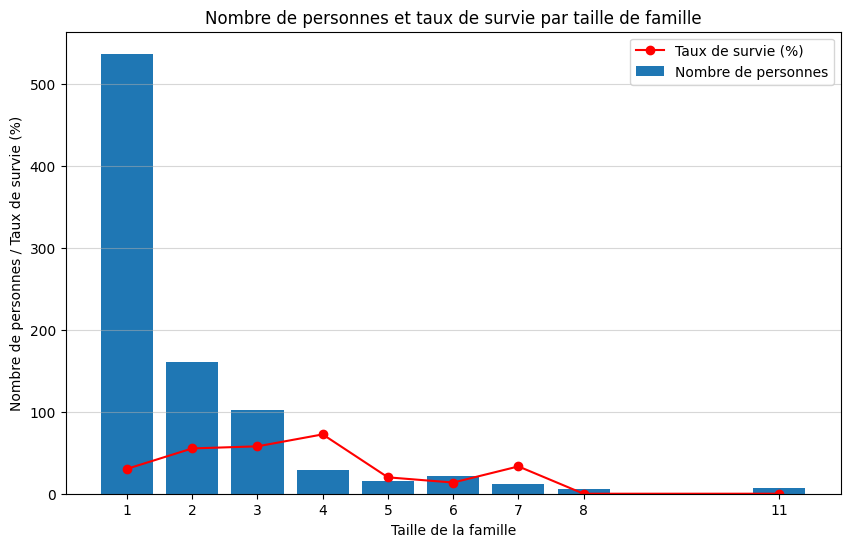

In [15]:
import matplotlib.pyplot as plt

family_stats = train.groupby('FamilySize')['Survived'].agg(['count', 'mean'])


plt.figure(figsize=(10, 6))
plt.bar(family_stats.index, family_stats['count'], label='Nombre de personnes')
plt.plot(family_stats.index, family_stats['mean'] * 100, marker='o', color='red', label='Taux de survie (%)')

plt.xlabel('Taille de la famille')
plt.ylabel('Nombre de personnes / Taux de survie (%)')
plt.title('Nombre de personnes et taux de survie par taille de famille')
plt.xticks(family_stats.index)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

2.5 Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

In [16]:

train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

print(train[['PassengerId', 'Name', 'Age', 'Sex', 'IsAlone']].head(10))

   PassengerId                                               Name   Age  \
0            1                            Braund, Mr. Owen Harris  22.0   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2            3                             Heikkinen, Miss. Laina  26.0   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4            5                           Allen, Mr. William Henry  35.0   
5            6                                   Moran, Mr. James   NaN   
6            7                            McCarthy, Mr. Timothy J  54.0   
7            8                     Palsson, Master. Gosta Leonard   2.0   
8            9  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0   
9           10                Nasser, Mrs. Nicholas (Adele Achem)  14.0   

      Sex  IsAlone  
0    male        0  
1  female        0  
2  female        1  
3  female        0  
4    male        1  
5    male        1  
6    male        1  
7    m

2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.

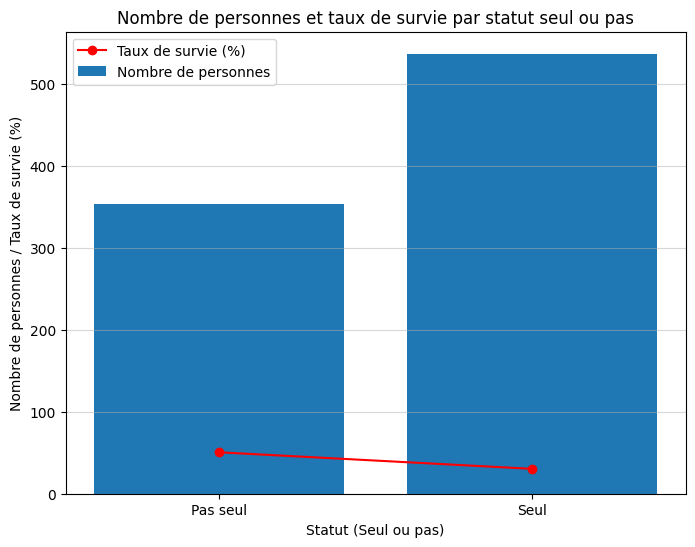

In [17]:
import matplotlib.pyplot as plt

alone_stats = train.groupby('IsAlone')['Survived'].agg(['count', 'mean'])

plt.figure(figsize=(8, 6))
plt.bar(alone_stats.index, alone_stats['count'], label='Nombre de personnes')
plt.plot(alone_stats.index, alone_stats['mean'] * 100, marker='o', color='red', label='Taux de survie (%)')

plt.xlabel('Statut (Seul ou pas)')
plt.ylabel('Nombre de personnes / Taux de survie (%)')
plt.title('Nombre de personnes et taux de survie par statut seul ou pas')
plt.xticks([0, 1], ['Pas seul', 'Seul'])
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

2.7 Calculer l'information mutuelle sur les données train.

Attention : Il y a des données continues et des données discrètes

Ignorer les colonnes Name, Ticket et Cabin

Valeurs manquantes détectées :
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
FamilySize      0
IsAlone         0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64
Scores d'information mutuelle :
 Sex_male      0.184048
Fare          0.152009
Pclass        0.050234
FamilySize    0.037445
IsAlone       0.032295
Age           0.029861
Embarked_S    0.018206
SibSp         0.000000
Parch         0.000000
Embarked_Q    0.000000
dtype: float64


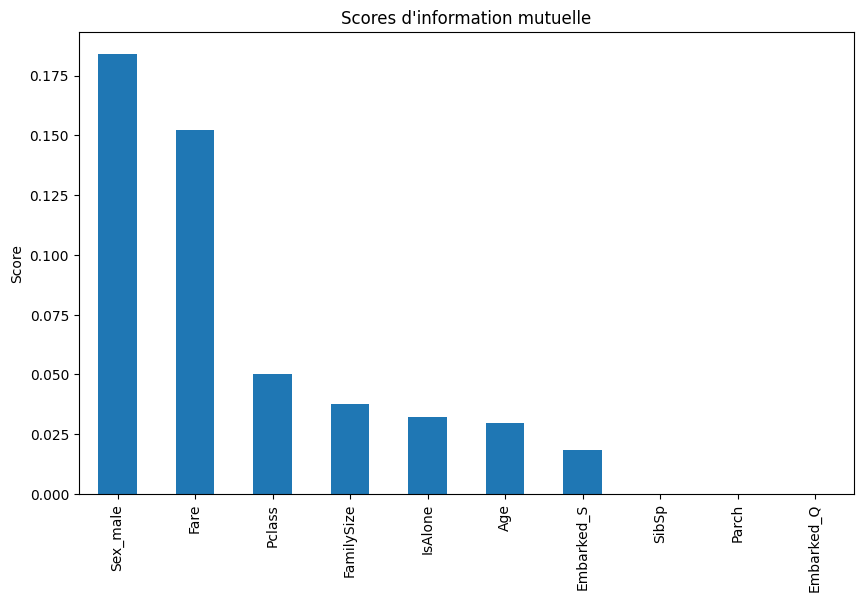

Valeurs manquantes détectées :
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
FamilySize      0
IsAlone         0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64
Scores d'information mutuelle :
 Fare          0.143596
Sex_male      0.111106
Pclass        0.089062
FamilySize    0.055457
Embarked_S    0.043581
Embarked_Q    0.038516
Age           0.034634
SibSp         0.024865
Parch         0.023910
IsAlone       0.000000
dtype: float64


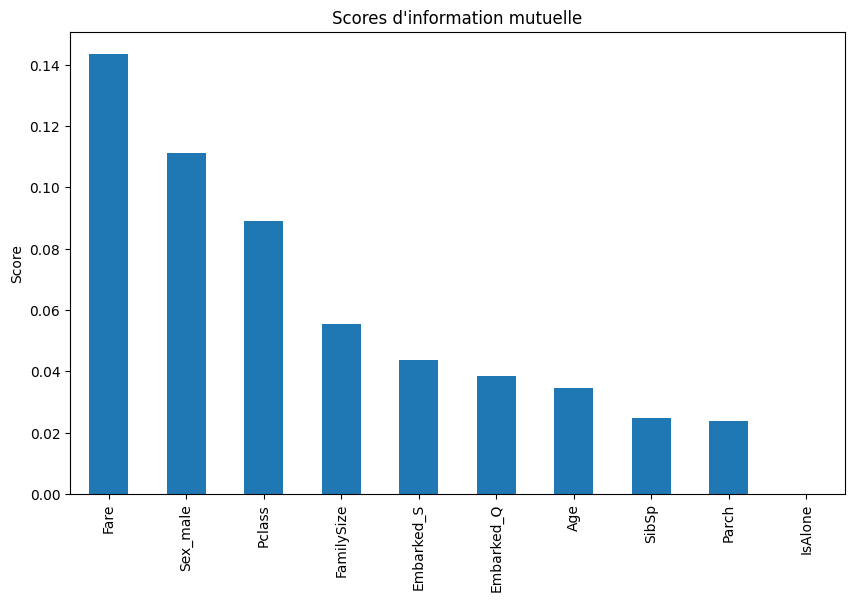

In [20]:
from sklearn.feature_selection import mutual_info_regression


features = train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])


features = pd.get_dummies(features, drop_first=True)


if features.isnull().sum().sum() > 0:
    print("Valeurs manquantes détectées :")
    print(features.isnull().sum())
    features.fillna(features.median(), inplace=True)

mutual_info_scores = mutual_info_regression(features, train['Survived'])


feature_scores = pd.Series(mutual_info_scores, index=features.columns)
feature_scores.sort_values(ascending=False, inplace=True)

print("Scores d'information mutuelle :\n", feature_scores)
feature_scores.plot(kind='bar', title="Scores d'information mutuelle", figsize=(10, 6))
plt.ylabel("Score")
plt.show()


2.8 Afficher dans un graphique les scores d'information mutuelle par feature

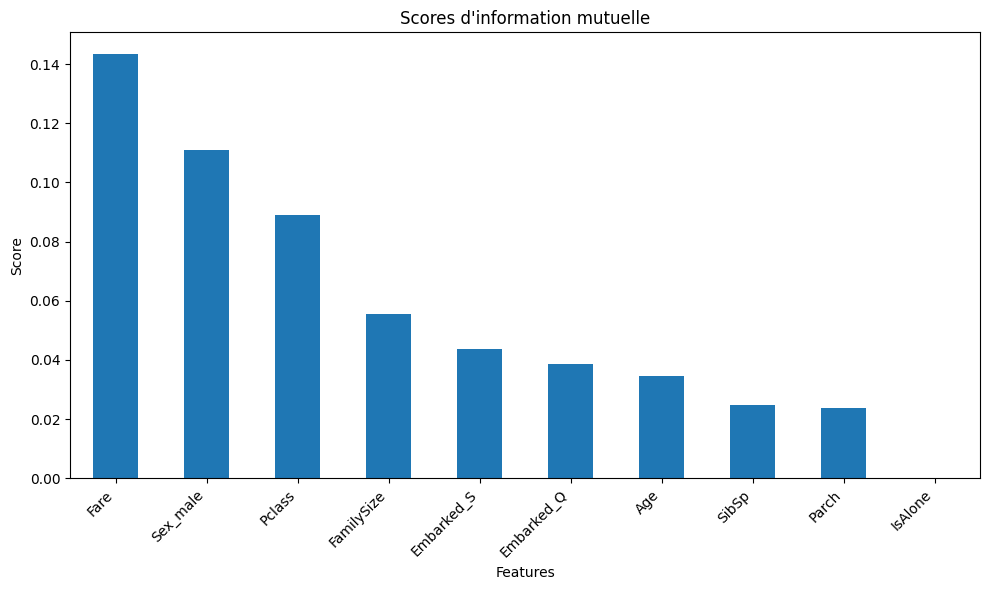

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feature_scores.plot(kind='bar', title="Scores d'information mutuelle", figsize=(10, 6))
plt.ylabel("Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Question 1 : La variable Classe est-elle utile pour prévoir la survie ? Pourquoi ?
Oui, car les passagers de 1ère classe survivent plus souvent que ceux de 3ème classe.


### Question 2 : Même question pour la variable Sex
Oui, les femmes survivent beaucoup plus que les hommes.

### Question 3 : Comment traiter le variables liées à la famille du passager ?
pour traiter les variables on fais:
(FamilySize) : taille totale de la famille (SibSp + Parch + 1).
(IsAlone) : indique si le passager est seul (FamilySize = 1).




## 3. Traitement des données manquantes (à faire sur les données Train et Test)

3.1 La variable "Embarked" possède des valeurs nulles, compléter par la valeur majoritaire (S).

In [22]:
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

<ipython-input-22-0da439fa1b32>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace=True)
<ipython-input-22-0da439fa1b32>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

3.2 Afficher l'influence du port d'embarquement sur la Survie

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64
Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


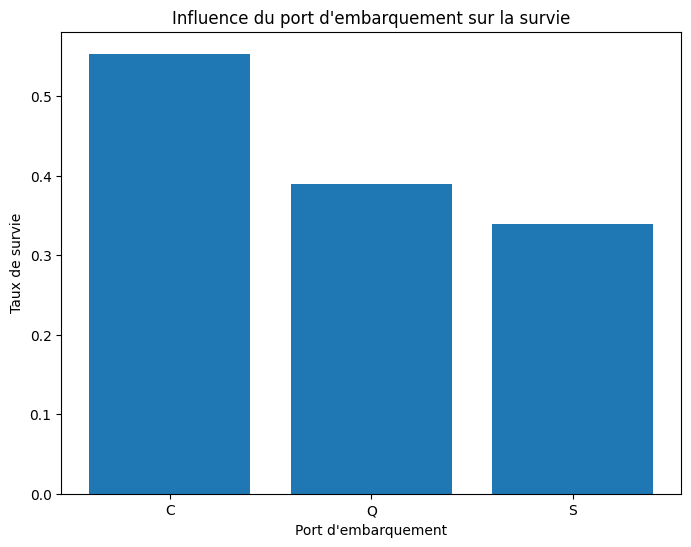

In [23]:
survival_rate_by_embarked = train.groupby('Embarked')['Survived'].mean()
print(survival_rate_by_embarked)

survival_rate_percentage_embarked = survival_rate_by_embarked * 100
print(survival_rate_percentage_embarked)

plt.figure(figsize=(8, 6))
plt.bar(survival_rate_by_embarked.index, survival_rate_by_embarked.values)
plt.xlabel("Port d'embarquement")
plt.ylabel("Taux de survie")
plt.title("Influence du port d'embarquement sur la survie")
plt.show()

3.3 La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

In [25]:
for df in [train, test]:
    df['Fare'].fillna(train['Fare'].median(), inplace=True)

<ipython-input-25-6795c7218854>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(train['Fare'].median(), inplace=True)


3.4 Créer une variable CategoricalFare Découpant la valeur de ticket en 4 catégories de tailles à peu près égales.

<ipython-input-26-de81e54e8e75>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survie_fare = train.groupby('CategoricalFare')['Survived'].mean() * 100


CategoricalFare
0    19.730942
1    30.357143
2    45.495495
3    58.108108
Name: Survived, dtype: float64


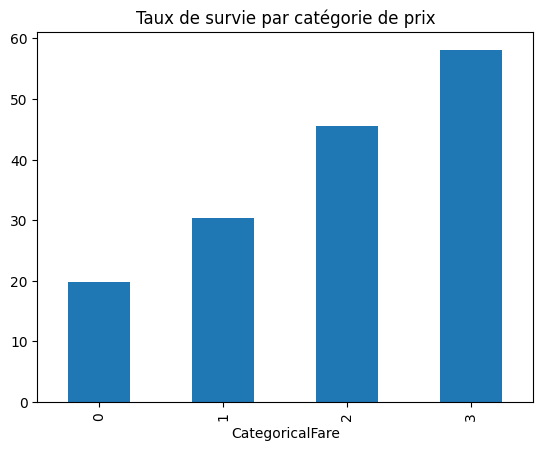

In [26]:
for df in [train, test]:
    df['CategoricalFare'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3])

survie_fare = train.groupby('CategoricalFare')['Survived'].mean() * 100
print(survie_fare)
survie_fare.plot(kind='bar', title="Taux de survie par catégorie de prix")
plt.show()

3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.

<ipython-input-27-de81e54e8e75>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survie_fare = train.groupby('CategoricalFare')['Survived'].mean() * 100


CategoricalFare
0    19.730942
1    30.357143
2    45.495495
3    58.108108
Name: Survived, dtype: float64


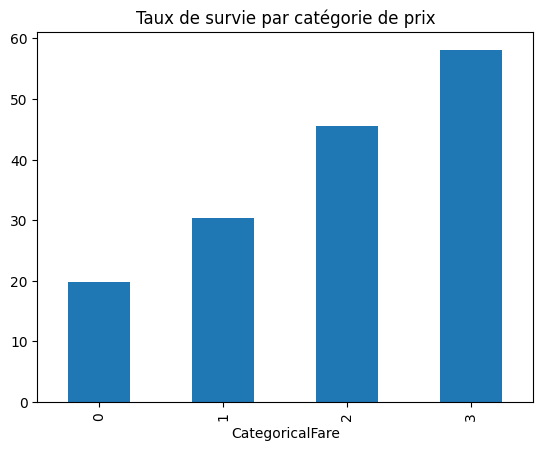

In [27]:
for df in [train, test]:
    df['CategoricalFare'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3])

survie_fare = train.groupby('CategoricalFare')['Survived'].mean() * 100
print(survie_fare)
survie_fare.plot(kind='bar', title="Taux de survie par catégorie de prix")
plt.show()

3.6 Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).

In [28]:
age_mean, age_std = train['Age'].mean(), train['Age'].std()
for df in [train, test]:
    df['Age'].fillna(np.random.randint(age_mean - age_std, age_mean + age_std), inplace=True)


<ipython-input-28-32b4d4e337d0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(np.random.randint(age_mean - age_std, age_mean + age_std), inplace=True)


3.7 Créer une variable CategoricalAge Découpant la valeur d'age en 5 tranches d'age de même taille.

<ipython-input-29-bc1cda74f2e2>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survie_age = train.groupby('CategoricalAge')['Survived'].mean() * 100


CategoricalAge
0    55.000000
1    36.994220
2    35.068493
3    43.478261
4     9.090909
Name: Survived, dtype: float64


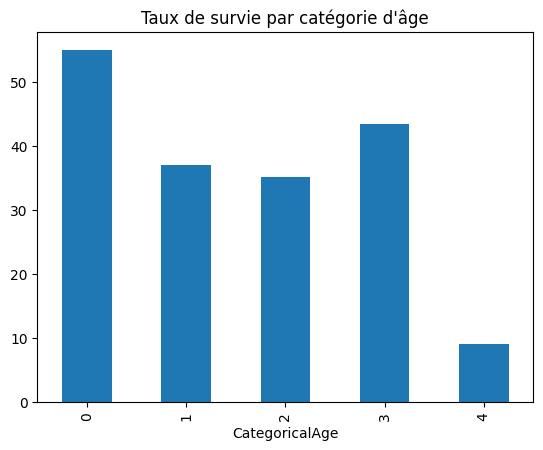

In [29]:
for df in [train, test]:
    df['CategoricalAge'] = pd.cut(df['Age'], 5, labels=[0, 1, 2, 3, 4])

survie_age = train.groupby('CategoricalAge')['Survived'].mean() * 100
print(survie_age)
survie_age.plot(kind='bar', title="Taux de survie par catégorie d'âge")
plt.show()


3.8 Analyser l'effet de ces catégories d'age sur la survie.

CategoricalAge
0    55.000000
1    36.994220
2    35.068493
3    43.478261
4     9.090909
Name: Survived, dtype: float64


<ipython-input-30-bc1cda74f2e2>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survie_age = train.groupby('CategoricalAge')['Survived'].mean() * 100


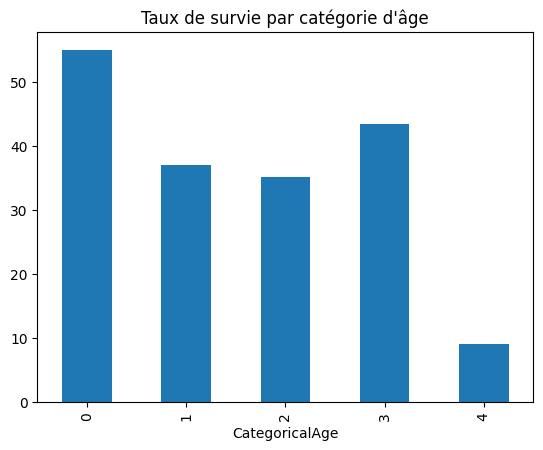

In [30]:
for df in [train, test]:
    df['CategoricalAge'] = pd.cut(df['Age'], 5, labels=[0, 1, 2, 3, 4])

survie_age = train.groupby('CategoricalAge')['Survived'].mean() * 100
print(survie_age)
survie_age.plot(kind='bar', title="Taux de survie par catégorie d'âge")
plt.show()


### Question 1 : Classer les variables par ordre d'intérêt

## 4 : Traitement de features complexes

4.1 : Le nom permet de retrouver le titre du passager. Trouver les titres lorsqu'ils existent.

In [31]:
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

for df in [train, test]:
    df['Title'] = df['Name'].apply(get_title)

print(train[['Name', 'Title']].head(20))

                                                 Name   Title
0                             Braund, Mr. Owen Harris      Mr
1   Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                              Heikkinen, Miss. Laina    Miss
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                            Allen, Mr. William Henry      Mr
5                                    Moran, Mr. James      Mr
6                             McCarthy, Mr. Timothy J      Mr
7                      Palsson, Master. Gosta Leonard  Master
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs
9                 Nasser, Mrs. Nicholas (Adele Achem)     Mrs
10                    Sandstrom, Miss. Marguerite Rut    Miss
11                           Bonnell, Miss. Elizabeth    Miss
12                     Saundercock, Mr. William Henry      Mr
13                        Andersson, Mr. Anders Johan      Mr
14               Vestrom, Miss. Hulda Amanda Adolfina    Miss
15      

4.2 : En utilisant la fonction pandas crosstab, afficher pour train le nombre d'occurences par titres (en ligne) et par sexe (en colonne)

In [32]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


4.3 :
Remplacer 'Melle et 'Ms' par 'Miss'

Remplacer 'Mme' par 'Mrs'

Creer une valeur "Rare" pour les autres titres avec moins de 10 occurences.

Calculer ensuite le taux de survie par titre

In [33]:
rare_titles = train['Title'].value_counts()[train['Title'].value_counts() < 10].index
for df in [train, test]:
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].replace(rare_titles, 'Rare')


## 5. Mise en forme des données non numériques

5.1 Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

In [34]:
# prompt:  Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

for df in [train, test]:
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

5.2 : Attribuer une valeur pour les possibilités de la variable "Title" ('Master','Miss','Mr','Mrs','Rare')

In [35]:
for df in [train, test]:
    df['Title'] = df['Title'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Rare': 4})

5.3 Remplacer les titres manquant par 0, et attribuer à la colonne le type entier

In [36]:
for df in [train, test]:
    df['Title'].fillna(0, inplace=True)
    df['Title'] = df['Title'].astype(int)

<ipython-input-36-b9b53f4e7adf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title'].fillna(0, inplace=True)
<ipython-input-36-b9b53f4e7adf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

5.4 Attribuer une valeur numérique aux 4 catégories de la variable Fare

In [39]:
print(train['CategoricalFare'].head())

0    0
1    3
2    1
3    3
4    1
Name: CategoricalFare, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


5.5 Attibuer une valeur numérique au Port d'embarquement (Embarked)

In [40]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

5.6 Supprimer les features inutiles

In [41]:

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Age']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

5.7 Afficher les infos pour les deux datasets

In [42]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Survived         891 non-null    int64   
 1   Pclass           891 non-null    int64   
 2   Sex              891 non-null    int64   
 3   Embarked         891 non-null    int64   
 4   FamilySize       891 non-null    int64   
 5   IsAlone          891 non-null    int64   
 6   CategoricalFare  891 non-null    category
 7   CategoricalAge   891 non-null    category
 8   Title            891 non-null    int64   
dtypes: category(2), int64(7)
memory usage: 51.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pclass           418 non-null    int64   
 1   Sex              418 non-null    int64   
 2   Embarked         418 non-

5.8 Sauver les deux datasets dans des fichier csv. Eviter d'écrire un index (n° de ligne)

In [43]:
train.to_csv('train_processed.csv', index=False)
test.to_csv('test_processed.csv', index=False)